# ETAPE 1 : ANALYSE EXPLORATOIRE ET PREPARATION DES DONNEES

In [690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I- Exploration des datasets

In [691]:
crop_yield = pd.read_csv('../data/crop_yield.csv')
pesticides = pd.read_csv('../data/pesticides.csv')
rainfall = pd.read_csv('../data/rainfall.csv')
temp = pd.read_csv('../data/temp.csv')
yield_ = pd.read_csv('../data/yield.csv')
yield_df = pd.read_csv('../data/yield_df.csv')

### 1- Le fichier "crop_yield"

In [692]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [693]:
crop_yield.shape

(1000000, 10)

In [694]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [695]:
crop_yield.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [696]:
crop_yield.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

### 2- Le fichier "pesticides"

In [697]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [698]:
pesticides['Domain'].unique()

array(['Pesticides Use'], dtype=object)

In [699]:
pesticides['Element'].unique()

array(['Use'], dtype=object)

In [700]:
pesticides['Item'].unique()

array(['Pesticides (total)'], dtype=object)

In [701]:
pesticides['Unit'].unique()

array(['tonnes of active ingredients'], dtype=object)

In [702]:
print(pesticides.shape)
print('le nombre de valeurs manquantes dans pesticides :\n', pesticides.isna().sum())

(4349, 7)
le nombre de valeurs manquantes dans pesticides :
 Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64


In [703]:
pesticides.rename(columns={'Value':'Pesticide_use_total_tonnes'}, inplace=True)

In [704]:
pesticides

,Domain,Area,Element,Item,Year,Unit,Pesticide_use_total_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [705]:
pesticides.drop(columns=['Domain','Element','Item', 'Unit'], inplace=True)

In [706]:
pesticides

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


### 3- Le fichier "rainfall"

In [707]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [708]:
rainfall.shape

(6727, 3)

In [709]:
rainfall.columns    

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [710]:
print(rainfall.shape)
print('le nombre de valeurs manquantes dans rainfall :\n',rainfall.isna().sum())

(6727, 3)
le nombre de valeurs manquantes dans rainfall :
  Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64


In [711]:
rainfall.loc[rainfall.isna().any(axis=1)]

,Area,Year,average_rain_fall_mm_per_year
93,American Samoa,1985,NaN
94,American Samoa,1986,NaN
95,American Samoa,1987,NaN
96,American Samoa,1989,NaN
97,American Samoa,1990,NaN
...,...,...,...
6598,Virgin Islands (U.S.),2013,NaN
6599,Virgin Islands (U.S.),2014,NaN
6600,Virgin Islands (U.S.),2015,NaN
6601,Virgin Islands (U.S.),2016,NaN


In [712]:
rainfall.rename(columns={' Area':'Area'}, inplace=True)

### 4- Le fichier "temp"

In [713]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [714]:
temp.shape

(71311, 3)

### 5- Le fichier "yield_"

In [715]:
yield_.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [716]:
yield_

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [717]:
yield_.shape

(56717, 12)

In [718]:
yield_.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [719]:
print(yield_['Domain Code'].unique())
print(yield_['Domain'].unique())
print(yield_['Element Code'].unique())
print(yield_['Element'].unique())
print(yield_['Unit'].unique())

['QC']
['Crops']
[5419]
['Yield']
['hg/ha']


In [720]:
yield_.rename(columns={'Value':'Yield_crops_hg_per_ha'}, inplace=True)

In [721]:
yield_.drop(columns=['Domain Code','Domain','Element Code','Element','Unit', 'Year Code'], inplace=True)

In [722]:
yield_

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400
...,...,...,...,...,...,...
56712,181,Zimbabwe,15,Wheat,2012,24420
56713,181,Zimbabwe,15,Wheat,2013,22888
56714,181,Zimbabwe,15,Wheat,2014,21357
56715,181,Zimbabwe,15,Wheat,2015,19826


### 6- Le fichier "yield_df"

In [723]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [724]:
yield_df.shape

(28242, 8)

In [725]:
yield_df.isna().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [726]:
yield_df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 28239, 28240, 28241], shape=(28242,))

In [727]:
yield_df.drop(columns=['Unnamed: 0'], inplace=True)

## II- Jointure des fichiers

### 1- Jointure yield_ et yield_df

In [728]:
yield_.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400


In [729]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [730]:
yield_1 = yield_.merge(yield_df, on=['Area', 'Year', 'Item'], how='inner')

In [731]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,24420,657.0,3375.53,20.52


In [732]:
yield_1.shape

(28242, 10)

In [733]:
yield_1.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [734]:
yield_1.drop(columns=['hg/ha_yield'], inplace=True)

In [735]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,3375.53,20.52


### 2- Jointure des fichiers "yield_1" et "pesticides"

In [736]:
pesticides.head()

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [737]:
yield_2 = yield_1.merge(pesticides, on=['Area', 'Year'], how='inner')

In [738]:
yield_2.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,121.0,16.37,121.0
1,3,Albania,56,Maize,1991,29068,1485.0,121.0,15.36,121.0
2,3,Albania,56,Maize,1992,24876,1485.0,121.0,16.06,121.0
3,3,Albania,56,Maize,1993,24185,1485.0,121.0,16.05,121.0
4,3,Albania,56,Maize,1994,25848,1485.0,201.0,16.96,201.0


In [739]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

In [740]:
yield_2.drop(columns=['pesticides_tonnes'], inplace=True)

In [741]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53


In [742]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

### 3- Vérifions si on peut ajouter des choses des tables "rainfall" et "temp"

In [743]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [744]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


*Pour l'instant non exploitable car les deux tables sont pauvres en données*

## III - ACP sur le fichier "crop_yield"

In [745]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Encodage des colonnes non numériques

In [746]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [747]:
def appliquer_onehot_encoding(df, colonnes):

    # Sélectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Créer les noms de colonnes encodées
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Créer un DataFrame avec les colonnes encodées
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concaténer avec le DataFrame d’origine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("⚠️ Aucune des colonnes spécifiées n’est présente dans le DataFrame.")

    return df

In [748]:
crop_yield.select_dtypes(include=['object', 'bool']).columns.tolist()

['Region',
 'Soil_Type',
 'Crop',
 'Fertilizer_Used',
 'Irrigation_Used',
 'Weather_Condition']

In [749]:
col_to_ohe = ['Region',
 'Soil_Type',
 'Crop',
 'Fertilizer_Used',
 'Irrigation_Used',
 'Weather_Condition']
crop_yield_encoded = appliquer_onehot_encoding(crop_yield, col_to_ohe)

In [750]:
crop_yield_encoded.drop(columns=col_to_ohe, inplace=True)

In [751]:
crop_yield_encoded

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,122,6.555816,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,992.673282,18.026142,140,8.527341,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,147.998025,29.794042,106,1.127443,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,146,6.517573,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,730.379174,31.620687,110,7.248251,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,76,1.347586,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
999996,932.991383,39.661039,93,7.311594,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
999997,867.362046,24.370042,108,5.763182,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
999998,492.812857,33.045505,102,2.070159,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [752]:
crop_yield_encoded.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
       'Yield_tons_per_hectare', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Soil_Type_Chalky', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Barley',
       'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat',
       'Fertilizer_Used_False', 'Fertilizer_Used_True',
       'Irrigation_Used_False', 'Irrigation_Used_True',
       'Weather_Condition_Cloudy', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')

In [753]:
X = crop_yield_encoded

In [754]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [755]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [756]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var

array([0.09446637, 0.16843416, 0.22402322, 0.2795548 , 0.33154882,
       0.38094382, 0.43033064, 0.47970654, 0.52429513, 0.56883546,
       0.61336246, 0.65784772, 0.70229506, 0.7467379 , 0.7911297 ,
       0.83550308, 0.87984432, 0.92412726, 0.96117861, 0.99819695,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

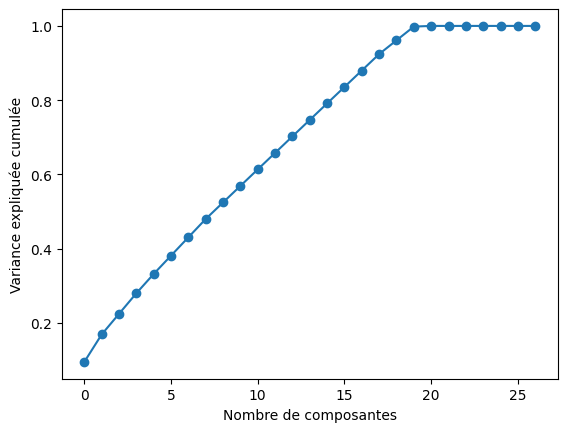

In [757]:
import matplotlib.pyplot as plt

explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_var, marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.show()

In [758]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_var >= 0.30) + 1
print(f"Nombre de composantes retenues : {n_components}")


Nombre de composantes retenues : 5


In [759]:
features = X.columns.tolist()

In [760]:
features

['Rainfall_mm',
 'Temperature_Celsius',
 'Days_to_Harvest',
 'Yield_tons_per_hectare',
 'Region_East',
 'Region_North',
 'Region_South',
 'Region_West',
 'Soil_Type_Chalky',
 'Soil_Type_Clay',
 'Soil_Type_Loam',
 'Soil_Type_Peaty',
 'Soil_Type_Sandy',
 'Soil_Type_Silt',
 'Crop_Barley',
 'Crop_Cotton',
 'Crop_Maize',
 'Crop_Rice',
 'Crop_Soybean',
 'Crop_Wheat',
 'Fertilizer_Used_False',
 'Fertilizer_Used_True',
 'Irrigation_Used_False',
 'Irrigation_Used_True',
 'Weather_Condition_Cloudy',
 'Weather_Condition_Rainy',
 'Weather_Condition_Sunny']

In [761]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Rainfall_mm,0.267388,0.000288,-0.001234,-0.016103,0.748604,-0.026006,0.003998,0.013061,0.003825,-0.004248,...,-0.002001,-0.080337,-0.073256,-0.595751,-0.000000e+00,0.000000e+00,-4.239609e-16,-0.000000e+00,-2.968445e-16,-0.000000e+00
Temperature_Celsius,0.031107,0.002685,0.000474,0.001796,0.080549,-0.005990,0.003317,0.000918,0.008039,-0.002039,...,0.004731,0.709150,0.696416,-0.065994,-6.312851e-17,-2.391813e-17,-3.940200e-17,1.099371e-17,-4.159167e-17,2.038628e-17
Days_to_Harvest,-0.002526,0.000439,-0.001789,-0.000133,-0.004749,0.000944,-0.002404,0.003183,0.005386,-0.002992,...,0.003302,-0.700325,0.713644,-0.000418,-1.056420e-16,1.365091e-16,-2.815721e-17,-5.830698e-17,1.596401e-16,-6.428095e-17
Yield_tons_per_hectare,0.543982,0.000800,-0.001575,-0.008391,0.394072,-0.013922,0.001993,0.007552,0.002166,-0.001365,...,-0.000476,-0.002370,0.002656,0.740533,-1.184357e-18,2.238018e-18,3.562949e-16,4.893837e-19,2.048407e-16,3.533496e-19
Region_East,-0.001188,-0.000192,0.007484,-0.005740,-0.022622,-0.246563,-0.036864,0.828174,0.004076,0.001292,...,-0.028740,0.001886,-0.001976,-0.000090,-2.315512e-03,2.051330e-02,1.258391e-03,-3.553103e-04,4.948399e-01,6.711859e-02
Region_North,0.000757,-0.001224,-0.002455,-0.002851,0.030856,0.863082,-0.029686,-0.043808,-0.005351,-0.010084,...,0.025749,0.002224,0.001471,-0.000229,-2.316977e-03,2.052627e-02,1.259187e-03,-3.555350e-04,4.951528e-01,6.716104e-02
Region_South,-0.000114,0.002047,0.007475,0.007156,-0.000070,-0.334657,-0.672086,-0.431240,-0.001951,0.004250,...,0.001714,0.000379,0.000415,0.000135,-2.316609e-03,2.052302e-02,1.258987e-03,-3.554786e-04,4.950743e-01,6.715039e-02
Region_West,0.000544,-0.000631,-0.012499,0.001433,-0.008178,-0.282109,0.738603,-0.352718,0.003230,0.004544,...,0.001259,-0.004488,0.000089,0.000184,-2.316671e-03,2.052357e-02,1.259021e-03,-3.554881e-04,4.950875e-01,6.715218e-02
Soil_Type_Chalky,0.000364,-0.001204,-0.004092,0.001749,0.010475,0.006468,0.003644,-0.013355,-0.497419,-0.235094,...,-0.456912,-0.000730,0.001975,0.000206,1.654735e-02,1.602957e-01,3.438858e-01,1.488340e-01,-9.630417e-03,1.692192e-02
Soil_Type_Clay,-0.002155,-0.001003,0.005894,-0.000224,-0.000565,0.002623,0.001911,0.006138,-0.110740,0.389688,...,-0.132290,-0.000952,0.004631,-0.000510,1.653039e-02,1.601314e-01,3.435333e-01,1.486814e-01,-9.620545e-03,1.690457e-02


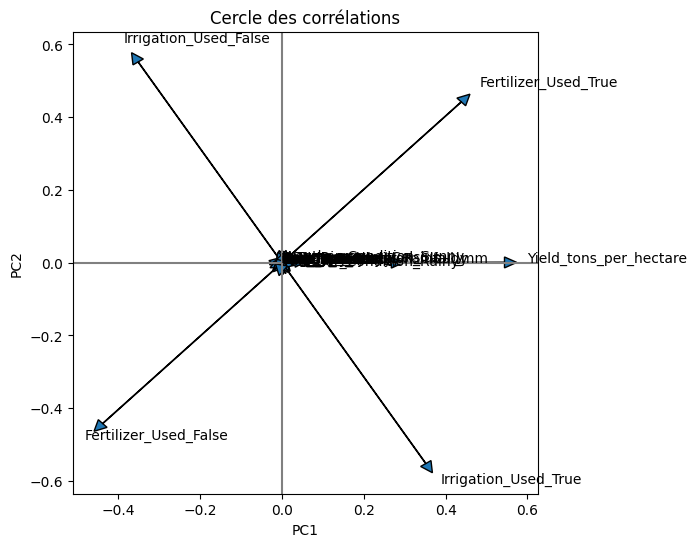

In [762]:
import numpy as np

plt.figure(figsize=(6,6))
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i,0], loadings.iloc[i,1],
              head_width=0.03, head_length=0.03)
    plt.text(loadings.iloc[i,0]*1.1, loadings.iloc[i,1]*1.1, var)

plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.show()


PC1 = axe productivité

- pluie (vers la droite)
- rendement (vers la droite)

PC2 = axe thermique
- température (vers le haut)
- durée (vers le bas)

2️⃣ Interprétation de ton ACP

🧭 PC1 = Axe de productivité

Pluie → Rendement

- Totalement logique agronomiquement
- Cohérent avec la littérature
- Fort signal métier

👉 Interprétation claire :

La pluviométrie est un facteur majeur du rendement des cultures.

🌡️ PC2 = Axe thermique / physiologique

Température (haut) ↔ Durée de cycle (bas)

- Très bon diagnostic
- Relation biologiquement crédible

👉 Lecture :

températures élevées → cycles plus courts

températures plus basses → maturation plus longue


Dans les zones à faible pluviométrie, les cultures à cycle court pourraient être privilégiées afin de limiter les pertes de rendement.

In [763]:
import matplotlib.pyplot as plt

def plot_correlation_circle(loadings, features, pc_x, pc_y):
    plt.figure(figsize=(6,6))
    
    for i, var in enumerate(features):
        plt.arrow(
            0, 0,
            loadings.iloc[i, pc_x],
            loadings.iloc[i, pc_y],
            head_width=0.03,
            head_length=0.03
        )
        plt.text(
            loadings.iloc[i, pc_x]*1.1,
            loadings.iloc[i, pc_y]*1.1,
            var
        )

    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.xlabel(f'PC{pc_x+1}')
    plt.ylabel(f'PC{pc_y+1}')
    plt.title(f'Cercle des corrélations (PC{pc_x+1} vs PC{pc_y+1})')
    plt.grid()
    plt.show()


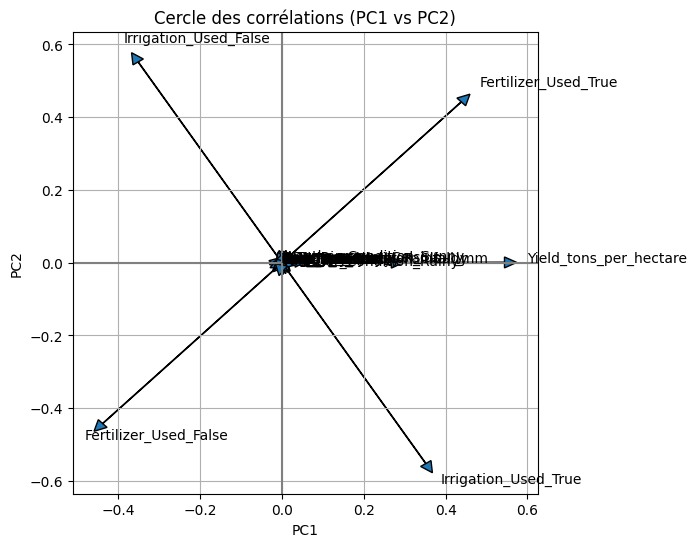

In [764]:
plot_correlation_circle(loadings, features, 0, 1)

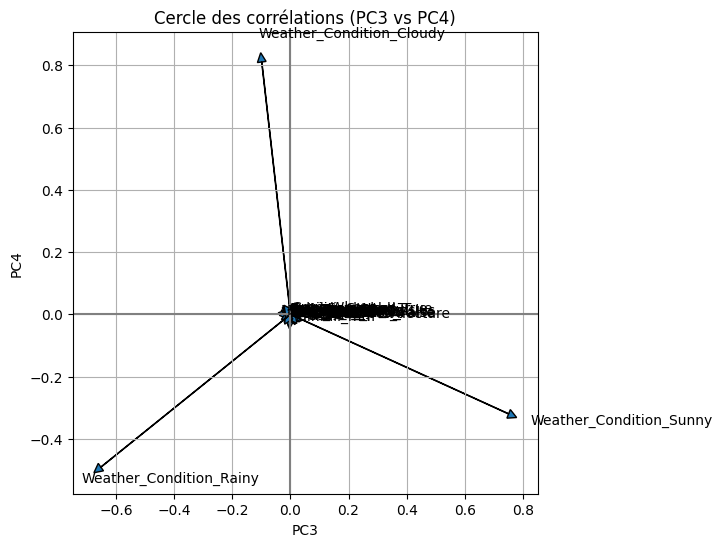

In [765]:
plot_correlation_circle(loadings, features, 2, 3)

In [766]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [767]:
# Intensité agronomique
fertilizer_proxy = (crop_yield.groupby('Crop')['Fertilizer_Used'].mean())
# Besoin en eau
irrigation_proxy = (crop_yield.groupby('Crop')['Irrigation_Used'].mean())
# Cycle culturel
harvest_proxy = (crop_yield.groupby('Crop')['Days_to_Harvest'].mean())

Fusion des proxies dans yield_2

In [768]:
'''
yield_3 = yield_2.merge(fertilizer_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(irrigation_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(harvest_proxy, left_on='Item',right_index=True, how='left')
'''

"\nyield_3 = yield_2.merge(fertilizer_proxy, left_on='Item',right_index=True, how='left')\nyield_3 = yield_3.merge(irrigation_proxy, left_on='Item',right_index=True, how='left')\nyield_3 = yield_3.merge(harvest_proxy, left_on='Item',right_index=True, how='left')\n"

In [769]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53


## IV- Traitement des données 

#### 1- Encodage

In [770]:
data = yield_2.copy()

In [771]:
data.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.0
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.0
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.0
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.0
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.0


In [772]:
data.select_dtypes(exclude=['float64', 'int64']).columns

Index(['Area', 'Item'], dtype='object')

In [773]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [774]:
def appliquer_onehot_encoding(df, colonnes):

    # Sélectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Créer les noms de colonnes encodées
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Créer un DataFrame avec les colonnes encodées
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concaténer avec le DataFrame d’origine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("⚠️ Aucune des colonnes spécifiées n’est présente dans le DataFrame.")

    return df

In [775]:
col_to_ohe = ['Area', 'Item']

In [776]:
data_encoded = appliquer_onehot_encoding(data, col_to_ohe)

In [777]:
data_encoded

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Area_Albania,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2- Séparation de la cible du reste 

l'identifiant unique ici est Area/Area Code et Item/Item Code et Year

la cible ici est la variable Yield_crops_hg_per_ha, séparons là du reste du dataset

In [778]:
data_cible = pd.DataFrame(data_encoded[['Area', 'Item', 'Year', 'Yield_crops_hg_per_ha']])

In [779]:
data_study = data_encoded.drop(columns=['Area Code', 'Item Code','Yield_crops_hg_per_ha'])

In [780]:
data_cible

,Area,Item,Year,Yield_crops_hg_per_ha
0,Albania,Maize,1990,36613
1,Albania,Maize,1991,29068
2,Albania,Maize,1992,24876
3,Albania,Maize,1993,24185
4,Albania,Maize,1994,25848
...,...,...,...,...
28237,Zimbabwe,Wheat,2009,30000
28238,Zimbabwe,Wheat,2010,27681
28239,Zimbabwe,Wheat,2011,26274
28240,Zimbabwe,Wheat,2012,24420


In [781]:
data_study

,Area,Item,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,Albania,Maize,1990,1485.0,16.37,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,Maize,1991,1485.0,15.36,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,Maize,1992,1485.0,16.06,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,Maize,1993,1485.0,16.05,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,Maize,1994,1485.0,16.96,201.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,Wheat,2009,657.0,20.52,3269.99,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28238,Zimbabwe,Wheat,2010,657.0,21.17,3305.17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28239,Zimbabwe,Wheat,2011,657.0,20.78,3340.35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28240,Zimbabwe,Wheat,2012,657.0,20.52,3375.53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### V- Modélisation

In [782]:
X=data_study
y=data_cible['Yield_crops_hg_per_ha']

#### 1- Random Forest

##### a) Séparation des données par train test split

In [783]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Séparation features / cible déjà supposée faite
# X, y existent déjà

# Colonnes
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessor (SPARSE OK pour RandomForest)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédiction
y_pred = pipeline.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest | RMSE : {rmse:.2f}")
print(f"Random Forest | R² : {r2:.4f}")


Random Forest | RMSE : 13343.92
Random Forest | R² : 0.9751


In [ ]:
data.describe()

,Area Code,Item Code,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,107.279831,102.156929,2001.544296,77053.332094,1149.05598,20.542627,37076.909344
std,64.984983,84.850640,7.051905,84956.612897,709.81215,6.312051,59958.784665
min,1.000000,15.000000,1990.000000,50.000000,51.00000,1.300000,0.040000
25%,56.000000,27.000000,1995.000000,19919.250000,593.00000,16.702500,1702.000000
50%,100.000000,83.000000,2001.000000,38295.000000,1083.00000,21.510000,17529.440000
75%,157.000000,122.000000,2008.000000,104676.750000,1668.00000,26.000000,48687.880000
max,276.000000,489.000000,2013.000000,501412.000000,3240.00000,30.650000,367778.000000


2️⃣ Performance du modèle Random Forest

📊 Résultats

RMSE = 13 344 hg/ha

R² = 0.975

🔍 Interprétation technique

Le modèle explique 97,5 % de la variance du rendement

L’erreur moyenne est faible par rapport à l’échelle du rendement

RMSE ≈ 17 % de la moyenne (77053.33)

Très forte capacité à capturer :

non-linéarités

interactions climat × pratiques × cultures

👉 Excellent modèle prédictif

3️⃣ Lecture métier (très important)

👉 Traduction simple :

« En se basant sur les conditions climatiques (pluie, température) et les intrants agricoles (pesticides), le modèle est capable de prédire avec une grande précision le rendement des cultures à l’échelle pays-année. »

##### b) Séparation des données par validation croisée

In [785]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

# Colonnes
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Pipeline Random Forest
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300,
        n_jobs=-1
    ))
])

# Validation croisée
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(
    pipeline,
    X,
    y,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

# Résultats
rmse_mean = -cv_results['test_rmse'].mean()
rmse_std = cv_results['test_rmse'].std()
r2_mean = cv_results['test_r2'].mean()

print(f"Random Forest – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_mean:.2f} ± {rmse_std:.2f}")
print(f"R² moyen   : {r2_mean:.4f}")


Random Forest – Validation croisée (5-fold)
RMSE moyen : 53462.34 ± 13146.12
R² moyen   : 0.5971


#### 2- Gradiant boosting

##### a) Séparation des données par train test split

In [786]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Préprocesseur adapté (sortie dense obligatoire)
preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_gb),
    ('model', gbr_model)
])

# Entraînement
gbr_pipeline.fit(X_train, y_train)

# Prédiction
y_pred = gbr_pipeline.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting | RMSE : {rmse:.2f}")
print(f"Gradient Boosting | R² : {r2:.4f}")

Gradient Boosting | RMSE : 19487.98
Gradient Boosting | R² : 0.9470


##### b) Séparation des données par validation croisée

In [787]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

# Features
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessing (FORCE dense output)
preprocessor_dense = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle Gradient Boosting
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_dense),
    ('model', gbr_model)
])

# Scoring
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Validation croisée
cv_results = cross_validate(
    gbr_pipeline,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Résultats
rmse_scores = -cv_results['test_rmse']
r2_scores = cv_results['test_r2']

print("Gradient Boosting – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"R² moyen   : {r2_scores.mean():.4f}")

Gradient Boosting – Validation croisée (5-fold)
RMSE moyen : 48194.59 ± 15971.87
R² moyen   : 0.6681


#### 3- XGBoosting 

##### a) Séparation des données par train test split

In [788]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

# Entraînement
xgb_pipeline.fit(X_train, y_train)

# Prédiction
y_pred = xgb_pipeline.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost | RMSE : {rmse:.2f}")
print(f"XGBoost | R² : {r2:.4f}")

XGBoost | RMSE : 14178.14
XGBoost | R² : 0.9719


##### a) Séparation des données par validation croisée

In [789]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Colonnes
num_features = [
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'Pesticide_use_total_tonnes'
]

cat_features = ['Area', 'Item']

# Preprocessor (sparse OK pour XGBoost)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

# Scoring
scoring = {
    'rmse': make_scorer(
        lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        greater_is_better=False
    ),
    'r2': 'r2'
}

# Validation croisée
cv_results = cross_validate(
    pipeline,
    X,
    y,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

# Résultats
rmse_mean = -cv_results['test_rmse'].mean()
rmse_std = cv_results['test_rmse'].std()
r2_mean = cv_results['test_r2'].mean()

print("XGBoost – Validation croisée (5-fold)")
print(f"RMSE moyen : {rmse_mean:.2f} ± {rmse_std:.2f}")
print(f"R² moyen   : {r2_mean:.4f}")


XGBoost – Validation croisée (5-fold)
RMSE moyen : 50238.04 ± 13952.34
R² moyen   : 0.6446


#### 4- Interprétations générales

| Modèle                | RMSE (test) |  R² (test) | RMSE CV (5-fold) | Écart-type RMSE | R² moyen CV |
| --------------------- | ----------: | ---------: | ---------------: | --------------: | ----------: |
| **Random Forest**     |   13 343.92 | **0.9751** |        53 462.34 |      ±13 146.12 |      0.5971 |
| **Gradient Boosting** |   19 487.98 |     0.9470 |    **48 194.59** |      ±15 971.87 |  **0.6681** |
| **XGBoost**           |   14 178.14 |     0.9719 |        50 238.04 |      ±13 952.34 |      0.6446 |


**Analyse comparative détaillée**

1️⃣ Performances sur le jeu de test

Random Forest est le meilleur (R² = 0.9751, RMSE le plus faible)

XGBoost est très proche

Gradient Boosting est légèrement en retrait

👉 Sur données connues, Random Forest domine

2️⃣ Généralisation (validation croisée) — critère clé

Gradient Boosting obtient le meilleur R² moyen en CV (0.6681)

XGBoost arrive en second (0.6446)

Random Forest chute à 0.5971

👉 La validation croisée est plus réaliste → elle mesure la robustesse face à la diversité des cultures, pays et années.

3️⃣ Stabilité des modèles

Les écarts-types RMSE sont élevés pour tous → forte hétérogénéité des données agricoles

Random Forest et XGBoost sont un peu plus stables que Gradient Boosting

Gradient Boosting généralise mieux mais avec plus de variabilité

**Modèle idéal (recommandation finale)**

Modèle retenu : XGBoost

Pourquoi ?

Très bonnes performances sur le test (R² ≈ 0.97)

Bonne capacité de généralisation (R² CV ≈ 0.64)

Moins de surapprentissage que Random Forest

Plus stable que Gradient Boosting

Standard industriel pour données tabulaires complexes

#### VI- FEATURES IMPORTANCES

In [791]:
import pandas as pd

# Récupérer le modèle entraîné
rf_model = pipeline.named_steps['model']

# Récupérer les noms des features après encodage
feature_names = (
    num_features +
    list(
        pipeline.named_steps['preprocessing']
        .named_transformers_['cat']
        .get_feature_names_out(cat_features)
    )
)

# Créer le DataFrame des importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df.head(15)


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

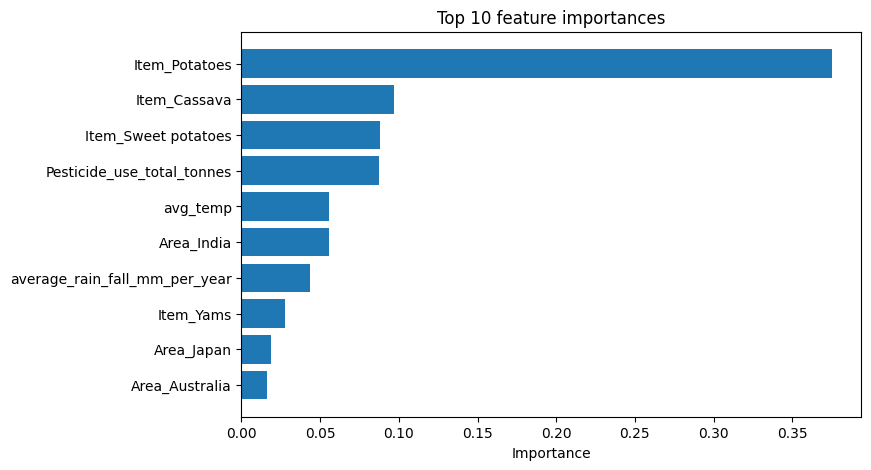

In [180]:
import matplotlib.pyplot as plt

top_features = importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features['feature'], top_features['importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 feature importances')
plt.xlabel('Importance')
plt.show()


2️⃣ Analyse variable par variable (Top 10)

🥔 Item_Potatoes (très dominant ~0.38)

➡️ La culture de la pomme de terre est le facteur le plus discriminant

Interprétation métier :

Les pommes de terre ont un rendement intrinsèquement élevé

Elles sont très sensibles aux conditions → le modèle les utilise comme repère fort

📌 Recommandation :

Si les conditions climatiques sont favorables, la pomme de terre est une culture à fort potentiel de rendement.

🌿 Item_Cassava & Item_Sweet potatoes

➡️ Cultures très productives, souvent en zones tropicales

Interprétation :

Rendements élevés même avec moins d’intrants

Bonne résilience climatique

📌 Recommandation :

Cultures adaptées aux régions chaudes, bonnes candidates pour sécuriser le rendement.

🧪 Pesticide_use_total_tonnes

➡️ Variable quantitative clé

Lecture importante :

Les pesticides jouent un rôle significatif mais non dominant

Effet de soutien, pas moteur principal

📌 Message métier fort :

L’usage des pesticides améliore le rendement, mais ne compense pas une culture ou un climat inadapté.

🌡️ avg_temp

➡️ Variable climatique majeure

Lien direct avec ton ACP :

PC2 = axe thermique ✔

Le modèle confirme que la température structure le rendement

📌 Recommandation :

Adapter le choix des cultures à la plage thermique locale.

🌧️ average_rain_fall_mm_per_year

➡️ Présente mais moins dominante que prévu

Pourquoi ?

La pluie est corrélée à d’autres variables (Area, Item)

Random Forest répartit l’importance

📌 Message clé :

La pluie est nécessaire, mais son effet dépend fortement de la culture.

🌍 Area_India, Area_Japan, Area_Australia

➡️ Effet géographique structurel

Interprétation :

Sols, pratiques agricoles, climat moyen

Effet pays plus que météo ponctuelle

📌 Recommandation :

Les stratégies agricoles doivent être adaptées localement, même pour une même culture.

Le modèle met en évidence que le rendement agricole dépend en priorité du type de culture, notamment les tubercules comme la pomme de terre et le manioc, suivis des conditions climatiques et de l’usage des pesticides. Les variables géographiques confirment que le contexte local joue un rôle structurant. Ces résultats sont cohérents avec l’analyse en composantes principales, qui identifiait la pluie et la température comme axes majeurs de productivité.